In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGB
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, StratifiedKFold, LeavePOut
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from google.colab import drive

drive.mount("drive/")


Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


In [ ]:
fieldpath = "drive/My Drive/Nursing Challenge/Field/"
data = pd.read_pickle(fieldpath + "Filtered/newtrain.pkl", compression="gzip")


In [ ]:
data.reset_index(inplace=True, drop=True)
data


,activity_type_id,tbodymean-X,tbodymean-Y,tbodymean-Z,tbodystd-X,tbodystd-Y,tbodystd-Z,tbodymin-X,tbodymin-Y,tbodymin-Z,tbodymax-X,tbodymax-Y,tbodymax-Z,tbodysum-X,tbodysum-Y,tbodysum-Z,tbodymad-X,tbodymad-Y,tbodymad-Z,tbodyenergy-X,tbodyenergy-Y,tbodyenergy-Z,tbodyentropy-X,tbodyentropy-Y,tbodyentropy-Z,tbodyiqr-X,tbodyiqr-Y,tbodyiqr-Z,tbodysma,tbodycorr-XY,tbodycorr-YZ,tbodycorr-ZX,tgravitymean-X,tgravitymean-Y,tgravitymean-Z,tgravitystd-X,tgravitystd-Y,tgravitystd-Z,tgravitymin-X,tgravitymin-Y,...,tjerk_magmad,tjerk_magenergy,tjerk_magentropy,tjerk_magiqr,fbody_magmean,fbody_magstd,fbody_magmin,fbody_magmax,fbody_magsum,fbody_magmad,fbody_magenergy,fbody_magentropy,fbody_magiqr,fjerk_magmean,fjerk_magstd,fjerk_magmin,fjerk_magmax,fjerk_magsum,fjerk_magmad,fjerk_magenergy,fjerk_magentropy,fjerk_magiqr,fbodykurtosis-X,fbodykurtosis-Y,fbodykurtosis-Z,fbodyskew-X,fbodyskew-Y,fbodyskew-Z,fbodymaxInds-X,fbodymaxInds-Y,fbodymaxInds-Z,fjerkkurtosis-X,fjerkkurtosis-Y,fjerkkurtosis-Z,fjerkskew-X,fjerkskew-Y,fjerkskew-Z,fjerkmaxInds-X,fjerkmaxInds-Y,fjerkmaxInds-Z
0,9,-0.003372,-0.000394,-0.013947,0.581300,0.166399,0.207186,-3.184333,-0.653526,-0.393533,1.719325,0.630987,1.723173,-2.697426,-0.315220,-11.157728,0.360502,0.104374,0.085738,0.337922,0.027689,0.043120,6.663780,6.649091,6.576056,0.366884,0.116124,0.057752,-0.017713,-0.454282,0.313830,-0.596540,3.878351,8.948315,0.291120,1.964864,0.775288,0.554544,-0.263242,7.252671,...,0.032876,0.004875,5.848996,0.031693,280.058832,2031.088365,0.102743,36889.401432,2.240471e+05,502.112731,4.203753e+06,3.479737,0.791164,3.073421,10.558419,0.019787,83.348704,2458.736515,5.134130,120.926123,4.450274,0.168624,265.827613,95.086172,28.472929,15.266965,9.189549,5.083296,5,9,9,26.641781,36.379632,13.136312,4.882106,5.625737,3.583519,17,30,30
1,9,-0.067041,0.036655,0.341938,2.023346,1.237948,2.273486,-4.506591,-3.694912,-3.388927,3.563232,2.120019,4.731531,-17.765908,9.713673,90.613471,1.658011,0.948210,2.010528,4.098422,1.533859,5.285659,5.451945,5.509918,5.362148,2.763629,1.412085,4.160590,0.311552,-0.088736,-0.447590,-0.365176,0.550350,8.232278,2.565768,0.389105,0.134611,0.808923,0.041693,7.784471,...,0.152717,0.173344,5.398191,0.237024,2115.047638,8653.337322,0.078515,66322.154780,5.604876e+05,3803.463992,7.935367e+07,2.915806,1.246192,34.405723,138.383214,0.098203,1185.777404,9117.516610,59.772290,20333.667684,3.071066,0.635156,38.647256,68.935484,42.364015,6.097992,7.774102,6.152855,7,6,3,73.539960,65.892471,26.709246,8.231947,7.698781,5.014316,7,6,6
2,10,-0.003420,0.027674,0.036281,1.723208,1.037363,0.950167,-4.961332,-3.576292,-1.772120,5.881746,2.764475,3.744260,-3.149744,25.487331,33.415133,1.293140,0.717272,0.683845,2.969458,1.076887,0.904134,6.755754,6.776869,6.693712,1.796589,0.893857,0.750678,0.060535,-0.171102,-0.478441,-0.120808,2.636515,6.688513,1.489724,3.090835,1.254344,1.626184,-2.770288,4.654112,...,0.095348,0.032003,6.339515,0.105512,3440.285214,24812.788907,1.577759,417281.865069,3.168503e+06,6307.933755,6.275101e+08,3.411907,8.691828,21.045297,86.836955,0.013833,765.648779,19382.718319,37.293282,7983.561262,4.239060,0.080128,225.224600,86.315169,127.840864,14.104840,8.914374,10.050447,6,5,5,58.203235,32.562992,29.866339,7.307913,5.433378,5.167513,9,10,17
3,9,-0.015356,0.014195,0.008646,1.901679,0.876079,0.957361,-5.541902,-3.466490,-3.260471,4.719459,1.911247,2.682611,-10.288634,9.510935,5.792554,1.241383,0.597688,0.683866,3.616620,0.767717,0.916615,6.428123,6.467079,6.458456,1.302423,0.886268,0.791545,0.007485,0.598814,-0.173762,-0.233813,2.710001,8.360669,1.229590,2.365795,1.321995,1.851089,-0.375652,6.539301,...,0.100855,0.036135,5.929531,0.118263,2763.278917,17013.113969,0.772390,202881.426840,1.851397e+06,5059.619427,2.970818e+08,3.263273,4.523874,19.098804,73.957982,0.071571,777.637661,12796.198770,32.842617,5834.547397,4.063748,0.524642,97.148591,127.399297,53.843881,9.354260,10.948510,7.076185,7,4,4,50.961582,31.836532,30.202186,6.525906,5.351296,5.324085,7,5,10
4,5,-

In [ ]:
for i in range(1, 13):
    print(f"Label-{i}: {len(data[data['activity_type_id']==i])}")


Label-1: 271
Label-2: 100
Label-3: 1229
Label-4: 6085
Label-5: 15091
Label-6: 82
Label-7: 1679
Label-8: 70
Label-9: 112
Label-10: 84
Label-11: 69
Label-12: 651


# Separating


In [ ]:
y = data["activity_type_id"]
X = data.drop(columns="activity_type_id")
print(X, "\n")
print(y, "\n")
print(X.dtypes)


       tbodymean-X  tbodymean-Y  ...  fjerkmaxInds-Y  fjerkmaxInds-Z
0        -0.003372    -0.000394  ...              30              30
1        -0.067041     0.036655  ...               6               6
2        -0.003420     0.027674  ...              10              17
3        -0.015356     0.014195  ...               5              10
4        -0.003420    -0.003248  ...              39              15
...            ...          ...  ...             ...             ...
25518     0.000434     0.012573  ...              20              20
25519    -0.030881    -0.015765  ...              12              12
25520     0.021442     0.015360  ...              22              22
25521    -0.016096     0.019052  ...               2               2
25522     0.003678     0.033969  ...               9               9

[25523 rows x 218 columns] 

0         9
1         9
2        10
3         9
4         5
         ..
25518    12
25519    12
25520    12
25521    12
25522    12
Name: acti

# K Nearest Neighbours (KNN)


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

model = KNN()
scores = cross_val_score(model, X, y, cv=10)
print(scores)
print(sum(scores) / 10)


[0.58558559 0.51821387 0.6827262  0.72178683 0.57327586 0.64655172
 0.74137931 0.74960815 0.72335423 0.58189655]
0.6524378320667676


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = KNN()
scores = cross_val_score(model, X, y, cv=10)
print(scores)
print(sum(scores) / 10)


[0.63298081 0.52526439 0.66509988 0.72766458 0.57797806 0.61010972
 0.73275862 0.75901254 0.72688088 0.58111285]
0.6538862325593959


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = KNN()
scores = cross_val_score(model, X, y, cv=10, scoring="f1_macro")
print(scores)
print(sum(scores) / 10)


[0.2879476  0.2849212  0.4130857  0.27612607 0.21894503 0.25331113
 0.22233335 0.22871293 0.21900532 0.14954138]
0.25539296882598284


# Random Forest Classifier (RFC)


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = RFC(n_estimators=180, n_jobs=3)
scores = cross_val_score(model, X, y, cv=10)
print(scores)
print(sum(scores) / 10)


[0.71092832 0.62828045 0.88758324 0.79780564 0.75587774 0.74098746
 0.78526646 0.79741379 0.74294671 0.6273511 ]
0.7474440912222022


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = RFC(n_estimators=180, n_jobs=4)
scores = cross_val_score(model, X, y, cv=10, scoring="f1_macro")
print(scores)
print(sum(scores) / 10)


[0.26623991 0.22362915 0.41759031 0.41054467 0.36731808 0.3091232
 0.18427297 0.20693239 0.19682164 0.13627135]
0.27187436744141014


# XGBoost (XGB)


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
model = XGB()
scores = cross_val_score(model, X, y, cv=10)
print(scores)
print(sum(scores) / 10)


[0.66666667 0.61104583 0.88405797 0.80094044 0.72648903 0.73510972
 0.78017241 0.77821317 0.72296238 0.60070533]
0.7306362942607321


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = XGB()
scores = cross_val_score(model, X, y, cv=10, scoring="f1_macro")
print(scores)
print(sum(scores) / 10)


[0.25111546 0.20975932 0.40515346 0.38813032 0.35176604 0.28152741
 0.17671144 0.20868029 0.19166711 0.1268091 ]
0.2591319947774241


# Upsampling and Downsampling


In [ ]:
majors = [3, 4, 5, 7]
minors = [1, 2, 6, 8, 9, 10, 11, 12]
df_major = data[
    (data["activity_type_id"] == 3)
    | (data["activity_type_id"] == 4)
    | (data["activity_type_id"] == 5)
    | (data["activity_type_id"] == 7)
]
df_minor = data[
    (data["activity_type_id"] == 1)
    | (data["activity_type_id"] == 2)
    | (data["activity_type_id"] == 6)
    | (data["activity_type_id"] == 8)
    | (data["activity_type_id"] == 9)
    | (data["activity_type_id"] == 10)
    | (data["activity_type_id"] == 11)
    | (data["activity_type_id"] == 12)
]
len(df_major), len(df_minor)


(24084, 1439)

In [ ]:
upsampled_minor = resample(
    df_minor[df_minor["activity_type_id"] == 1],
    replace=True,
    n_samples=1000,
    random_state=42,
)
for i in minors[1:]:
    upsampled = resample(
        df_minor[df_minor["activity_type_id"] == i],
        replace=True,
        n_samples=1000,
        random_state=42,
    )
    upsampled_minor = pd.concat([upsampled_minor, upsampled])
len(upsampled_minor)


8000

In [ ]:
upsampled_data = pd.concat([df_major, upsampled_minor])
upsampled_data.reset_index(drop=True, inplace=True)
upsampled_data


,activity_type_id,tbodymean-X,tbodymean-Y,tbodymean-Z,tbodystd-X,tbodystd-Y,tbodystd-Z,tbodymin-X,tbodymin-Y,tbodymin-Z,tbodymax-X,tbodymax-Y,tbodymax-Z,tbodysum-X,tbodysum-Y,tbodysum-Z,tbodymad-X,tbodymad-Y,tbodymad-Z,tbodyenergy-X,tbodyenergy-Y,tbodyenergy-Z,tbodyentropy-X,tbodyentropy-Y,tbodyentropy-Z,tbodyiqr-X,tbodyiqr-Y,tbodyiqr-Z,tbodysma,tbodycorr-XY,tbodycorr-YZ,tbodycorr-ZX,tgravitymean-X,tgravitymean-Y,tgravitymean-Z,tgravitystd-X,tgravitystd-Y,tgravitystd-Z,tgravitymin-X,tgravitymin-Y,...,tjerk_magmad,tjerk_magenergy,tjerk_magentropy,tjerk_magiqr,fbody_magmean,fbody_magstd,fbody_magmin,fbody_magmax,fbody_magsum,fbody_magmad,fbody_magenergy,fbody_magentropy,fbody_magiqr,fjerk_magmean,fjerk_magstd,fjerk_magmin,fjerk_magmax,fjerk_magsum,fjerk_magmad,fjerk_magenergy,fjerk_magentropy,fjerk_magiqr,fbodykurtosis-X,fbodykurtosis-Y,fbodykurtosis-Z,fbodyskew-X,fbodyskew-Y,fbodyskew-Z,fbodymaxInds-X,fbodymaxInds-Y,fbodymaxInds-Z,fjerkkurtosis-X,fjerkkurtosis-Y,fjerkkurtosis-Z,fjerkskew-X,fjerkskew-Y,fjerkskew-Z,fjerkmaxInds-X,fjerkmaxInds-Y,fjerkmaxInds-Z
0,5,-0.003420,-0.003248,0.014359,1.272078,0.679246,1.362798,-4.541427,-2.380073,-3.623822,3.371247,1.819719,4.747272,-3.071455,-2.916612,12.894758,0.904713,0.474449,0.969951,1.618193,0.461386,1.857424,6.754304,6.752241,6.726419,1.170177,0.632688,1.200115,0.007691,-0.130156,-0.712243,-0.011136,2.174068,8.472991,1.298332,1.478502,0.585454,1.998127,-0.287132,7.456331,...,0.126268,0.048879,6.334166,0.224934,2535.596103,12939.563576,1.502325e+00,146252.467513,2.276965e+06,4608.085131,1.738616e+08,3.844865,8.241122,31.787560,114.457224,8.368979e-03,881.579775,28545.228910,56.485441,14110.904994,4.323506,6.389393e-02,118.600766,107.126407,65.548122,9.893831,9.491486,7.626152,7,10,9,37.202157,45.295939,23.667942,5.733277,5.942149,4.762589,26,39,15
1,5,0.010085,-0.027636,0.045992,1.968224,0.709874,1.504299,-3.435474,-1.549736,-3.116245,5.165990,1.369229,3.403100,1.946451,-5.333742,8.876550,1.597228,0.616176,1.125248,3.874006,0.504685,2.265032,5.091884,5.139927,5.133156,2.707410,1.215065,1.734735,0.028442,0.247632,-0.430264,0.431119,0.865552,9.205263,1.780140,0.687671,0.472429,1.302369,-0.298035,7.963636,...,0.148929,0.101602,4.977838,0.308853,959.545468,4133.556728,6.020851e-01,30761.412912,1.851923e+05,1717.468861,1.800702e+07,2.550065,4.408242,14.878926,47.571547,1.765922e-01,298.547665,2871.632742,24.757904,2484.434509,3.086324,1.157287e+00,38.330962,25.341262,36.701412,6.067602,5.014739,6.055888,2,2,3,29.550088,10.650617,23.439230,5.082030,3.432382,4.608776,4,4,7
2,5,0.213635,0.076306,0.122198,2.007647,1.195379,1.985806,-4.597971,-2.007803,-3.527191,3.620713,2.177626,4.882867,47.427040,16.939924,27.127850,1.624121,1.054666,1.640832,4.076286,1.434754,3.958357,5.291859,5.218024,5.243492,2.383353,2.055187,2.922007,0.412139,0.144590,-0.627039,-0.090997,1.394789,7.500973,4.114900,0.836232,0.325743,1.205532,0.438360,6.472470,...,0.120873,0.097365,5.229793,0.199992,1538.794442,8486.831900,7.094404e-02,73744.742830,3.416124e+05,2761.452770,7.439420e+07,2.326306,1.884449,15.985554,52.911774,1.339636e-01,332.633319,3548.792948,26.799472,3055.193774,3.177728,8.890188e-01,94.050581,50.270064,63.690934,9.594209,6.833879,7.804919,2,2,3,28.979392,13.629987,43.067645,5.417763,3.747998,6.002993,8,10,3
3,5,-0.035495,0.066164,-0.095258,1.824050,1.463233,1.556513,-3.452244,-3.679706,-4.028920,4.629290,2.860046,3.470858,-14.233381,26.531834,-38.198591,1.442717,1.157871,1.215694,3.328419,2.145430,2.431807,5.843567,5.902055,5.905137,2.142633,1.929760,2.039472,-0.064589,-0.692265,-0.064067,-0.212100,3.172562,7.210006,2.875661,1.528674,0.952253,2.462686,1.118587,5.482064,...,0.160334,0.114378,5.734270,0.298699,2198.679397,11381.171008,5.812195e-01,136629.981274,8.816704e+05,3939.915529,1.343652e+08,3.140209,3.573057,31.924008,109.458999,3.084111e-02,751.320212,12801.527100,56.126495,13000.414799,3.623493,2.275169e-01,137.717209,144.692246,60.416879,11.126287,11.512015,7.236691,3,3,5,27.263611,62.874174,2

In [ ]:
for i in range(1, 13):
    print(f"Label-{i}: {len(upsampled_data[upsampled_data['activity_type_id']==i])}")


Label-1: 1000
Label-2: 1000
Label-3: 1229
Label-4: 6085
Label-5: 15091
Label-6: 1000
Label-7: 1679
Label-8: 1000
Label-9: 1000
Label-10: 1000
Label-11: 1000
Label-12: 1000


# Separating


In [ ]:
y = upsampled_data["activity_type_id"]
X = upsampled_data.drop(columns="activity_type_id")
print(X, "\n")
print(y, "\n")
print(X.dtypes)


       tbodymean-X  tbodymean-Y  ...  fjerkmaxInds-Y  fjerkmaxInds-Z
0        -0.003420    -0.003248  ...              39              15
1         0.010085    -0.027636  ...               4               7
2         0.213635     0.076306  ...              10               3
3        -0.035495     0.066164  ...              14              12
4         0.043290     0.051780  ...              16              19
...            ...          ...  ...             ...             ...
32079     0.174236    -0.009779  ...               4               2
32080    -0.000018    -0.000177  ...               9               3
32081     0.000800    -0.000639  ...               7               5
32082    -0.025062    -0.022467  ...              10               9
32083    -0.011964     0.011858  ...              17              17

[32084 rows x 218 columns] 

0         5
1         5
2         5
3         5
4         4
         ..
32079    12
32080    12
32081    12
32082    12
32083    12
Name: acti

# K Nearest Neighbours (KNN)


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = KNN()
scores = cross_val_score(model, X, y, cv=10)
print(scores)
print(sum(scores) / 10)


[0.63298081 0.52526439 0.66509988 0.72766458 0.57797806 0.61010972
 0.73275862 0.75901254 0.72688088 0.58111285]
0.6538862325593959


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = KNN()
scores = cross_val_score(model, X, y, cv=10, scoring="f1_macro")
print(scores)
print(sum(scores) / 10)


[0.2879476  0.2849212  0.4130857  0.27612607 0.21894503 0.25331113
 0.22233335 0.22871293 0.21900532 0.14954138]
0.25539296882598284


# Random Forest Classifier (RFC)


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = RFC(n_estimators=180, n_jobs=3)
scores = cross_val_score(model, X, y, cv=10)
print(scores)
print(sum(scores) / 10)


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = RFC(n_estimators=180, n_jobs=4)
scores = cross_val_score(model, X, y, cv=10, scoring="f1_macro")
print(scores)
print(sum(scores) / 10)


# XGBoost (XGB)


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = XGB()
scores = cross_val_score(model, X, y, cv=10)
print(scores)
print(sum(scores) / 10)


[0.71050171 0.6865067  0.89498286 0.81894671 0.75436409 0.77057357
 0.82793017 0.82637157 0.77836658 0.6627182 ]
0.7731262176437994


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

model = XGB()
scores = cross_val_score(model, X, y, cv=10, scoring="f1_macro")
print(scores)
print(sum(scores) / 10)


[0.71063083 0.70578032 0.81183478 0.79471268 0.79041481 0.7403557
 0.7312735  0.72439369 0.70470091 0.56589689]
0.727999411115934


# Predict


**In the next part, training data has been split to 75% train data and 25% CV data to generate classification report and confusion matrix. Need stronger validation here (like using K-fold to generate the report and the matrix)**


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=100, stratify=y
)
print("Splitting done")
model = RFC(n_estimators=180, n_jobs=4)
model.fit(X_train, y_train)
print("Training done")
y_pred = model.predict(X_test)
print(
    "Prediction generated, creating classification report and confusion matrix........\n"
)

print(accuracy_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Splitting done
Training done
Prediction generated, creating classification report and confusion matrix........

0.8690936292232889 

              precision    recall  f1-score   support

           1       0.94      0.96      0.95       250
           2       0.96      1.00      0.98       250
           3       0.69      0.11      0.19       307
           4       0.78      0.84      0.81      1521
           5       0.85      0.94      0.90      3773
           6       0.95      1.00      0.97       250
           7       0.96      0.37      0.53       420
           8       0.98      1.00      0.99       250
           9       0.98      1.00      0.99       250
          10       0.98      1.00      0.99       250
          11       0.98      1.00      0.99       250
          12       1.00      0.80      0.89       250

    accuracy                           0.87      8021
   macro avg       0.92      0.84      0.85      8021
weighted avg       0.87      0.87      0.85      8021



In [ ]:
# Label-wise accuracy for RFC
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()


array([0.956     , 1.        , 0.10749186, 0.84220907, 0.94434137,
       1.        , 0.36666667, 1.        , 1.        , 1.        ,
       1.        , 0.804     ])

In [ ]:
labelwise = cm.diagonal()
conf = confusion_matrix(y_test, y_pred)
conf


array([[ 239,    0,    0,    6,    4,    1,    0,    0,    0,    0,    0,
           0],
       [   0,  250,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   5,    5,   33,   45,  212,    3,    1,    0,    1,    2,    0,
           0],
       [   4,    3,    4, 1281,  223,    2,    2,    0,    1,    0,    1,
           0],
       [   5,    1,    9,  180, 3563,    5,    3,    4,    2,    0,    1,
           0],
       [   0,    0,    0,    0,    0,  250,    0,    0,    0,    0,    0,
           0],
       [   1,    1,    2,  107,  148,    2,  154,    1,    1,    2,    1,
           0],
       [   0,    0,    0,    0,    0,    0,    0,  250,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  250,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  250,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  250,
           0],
       [   0,    0,  

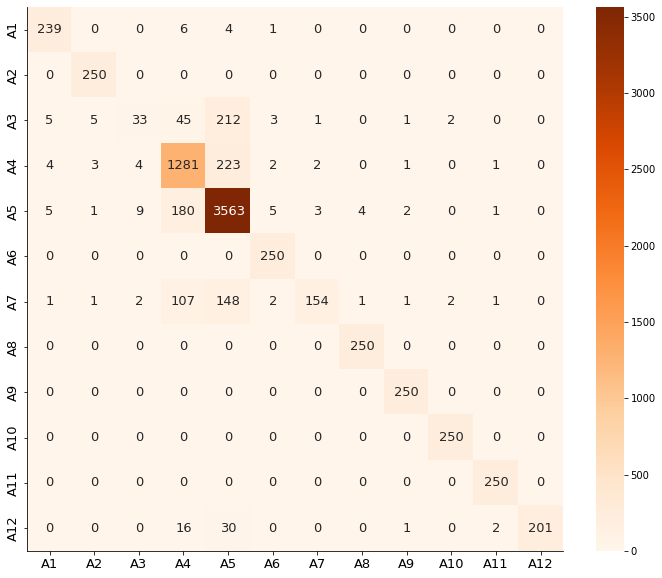

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(conf, annot=True, cmap="Oranges", annot_kws={"size": 13}, fmt="d")
plt.gca().spines["left"].set_visible(True)
plt.gca().spines["bottom"].set_visible(True)
plt.xticks(
    ticks=np.arange(0.5, 12, 1),
    labels=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12"],
    fontsize=13,
)
plt.yticks(
    ticks=np.arange(0.5, 12, 1),
    labels=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12"],
    fontsize=13,
    va="center",
)
plt.savefig(fieldpath + "Confusion_matrix6.png", dpi=300, format="png")
plt.savefig(fieldpath + "Confusion_matrix6.jpg", dpi=300, format="jpg")


# Bar


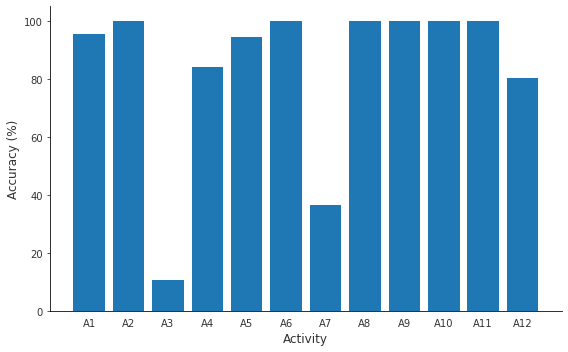

In [ ]:
accuracy = [i * 100 for i in labelwise]
Activity = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12"]
plt.figure(figsize=(8, 5))
plt.bar(Activity, accuracy)
plt.xlabel("Activity", fontsize=12, color=(0, 0, 0, 0.8))
plt.ylabel("Accuracy (%)", fontsize=12, color=(0, 0, 0, 0.8))
plt.tight_layout()
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.tick_params(bottom=False, color=(0, 0, 0, 0.8), labelcolor=(0, 0, 0, 0.8))
plt.savefig(fieldpath + "accuracy.jpg", dpi=300, format="jpg")
plt.savefig(fieldpath + "accuracy.png", dpi=300, format="png")


# Prediction


In [ ]:
test = pd.read_pickle(
    fieldpath + "../Test/NewFeature/features_u27.pkl", compression="gzip"
)
test


,user_id,start,finish,tbodymean-X,tbodymean-Y,tbodymean-Z,tbodystd-X,tbodystd-Y,tbodystd-Z,tbodymin-X,tbodymin-Y,tbodymin-Z,tbodymax-X,tbodymax-Y,tbodymax-Z,tbodysum-X,tbodysum-Y,tbodysum-Z,tbodymad-X,tbodymad-Y,tbodymad-Z,tbodyenergy-X,tbodyenergy-Y,tbodyenergy-Z,tbodyentropy-X,tbodyentropy-Y,tbodyentropy-Z,tbodyiqr-X,tbodyiqr-Y,tbodyiqr-Z,tbodysma,tbodycorr-XY,tbodycorr-YZ,tbodycorr-ZX,tgravitymean-X,tgravitymean-Y,tgravitymean-Z,tgravitystd-X,tgravitystd-Y,tgravitystd-Z,...,tjerk_magmad,tjerk_magenergy,tjerk_magentropy,tjerk_magiqr,fbody_magmean,fbody_magstd,fbody_magmin,fbody_magmax,fbody_magsum,fbody_magmad,fbody_magenergy,fbody_magentropy,fbody_magiqr,fjerk_magmean,fjerk_magstd,fjerk_magmin,fjerk_magmax,fjerk_magsum,fjerk_magmad,fjerk_magenergy,fjerk_magentropy,fjerk_magiqr,fbodykurtosis-X,fbodykurtosis-Y,fbodykurtosis-Z,fbodyskew-X,fbodyskew-Y,fbodyskew-Z,fbodymaxInds-X,fbodymaxInds-Y,fbodymaxInds-Z,fjerkkurtosis-X,fjerkkurtosis-Y,fjerkkurtosis-Z,fjerkskew-X,fjerkskew-Y,fjerkskew-Z,fjerkmaxInds-X,fjerkmaxInds-Y,fjerkmaxInds-Z
0,27,2018-12-01 00:08:55.450,2018-12-01 00:39:37.574,0.000068,0.000017,0.000011,0.015085,0.017431,0.002798,-0.054242,-0.095406,-0.016619,0.079074,0.109498,0.014927,0.252200,0.063767,0.040468,0.011004,0.012864,0.002045,0.000228,0.000304,0.000008,8.173082,8.194730,8.197571,0.016762,0.018157,0.003071,0.000097,0.004038,-0.022456,0.089948,9.552607,0.003016,0.113509,0.022211,0.018104,0.005211,...,0.003600,0.000057,7.338953,0.002513,1.580988,6.065077,0.006245,114.686801,5827.523217,2.314534,39.284687,6.273366,0.359355,0.171015,0.189031,0.000062,1.265522,630.359955,0.139796,0.064979,7.682583,0.215146,84.921511,158.413893,105.687749,8.290750,10.522479,9.112520,69,54,54,8.754657,8.490811,13.388387,2.553129,2.563850,3.015625,417,358,136
1,27,2018-12-01 00:39:37.574,2018-12-01 01:09:07.855,0.000055,-0.000089,0.000022,0.014357,0.014432,0.002598,-0.079864,-0.111962,-0.014098,0.072230,0.091000,0.012880,0.196188,-0.315300,0.076863,0.008690,0.008792,0.001607,0.000206,0.000208,0.000007,8.154730,8.162834,8.154070,0.008240,0.009691,0.001603,-0.000012,0.143003,-0.107772,-0.067956,9.555980,0.014872,0.110582,0.016428,0.019744,0.002844,...,0.003507,0.000054,6.930556,0.002559,1.178936,4.405693,0.002028,89.861633,4173.433523,1.622136,20.800020,6.431852,0.346650,0.153695,0.153423,0.000008,1.296747,544.081409,0.117868,0.047161,7.715244,0.192070,265.282119,165.094940,99.030440,13.272378,10.913240,8.830625,43,63,77,9.018168,5.905840,14.937487,2.442073,2.112219,3.235716,188,244,77
2,27,2018-12-01 01:09:07.855,2018-12-01 01:21:22.266,0.000101,0.000065,-0.000010,0.022449,0.019327,0.003656,-0.062625,-0.117732,-0.016203,0.094220,0.078999,0.017018,0.148527,0.095759,-0.014150,0.018273,0.013566,0.002798,0.000504,0.000374,0.000013,7.222307,7.278689,7.266492,0.031383,0.018901,0.004401,0.000157,-0.038958,0.021874,-0.181705,9.547868,0.005532,0.114109,0.014773,0.014823,0.004374,...,0.006655,0.000148,6.457571,0.005298,1.069630,3.367460,0.005471,34.676105,1572.356687,1.397866,12.483896,5.733724,0.369817,0.175958,0.186372,0.000002,1.488334,258.658009,0.136465,0.065696,6.808950,0.213821,73.517262,51.345391,62.286624,7.904575,6.551423,7.189774,29,48,25,6.739645,16.652006,8.987075,2.352783,3.206779,2.615852,149,232,260
3,27,2018-12-01 01:21:22.266,2018-12-01 01:27:45.863,0.000729,-0.000985,-0.000132,0.023592,0.029135,0.004328,-0.076793,-0.112678,-0.015092,0.079111,0.089516,0.012937,0.560230,-0.756564,-0.101674,0.018563,0.021560,0.003482,0.000557,0.000850,0.000019,6.591937,6.605365,6.598610,0.029425,0.028358,0.006085,-0.000388,-0.004950,-0.010755,-0.088613,9.553660,0.004976,0.116875,0.012299,0.019027,0.004122,...,0.010320,0.000323,5.990760,0.015253,0.890949,2.201128,0.006432,26.000720,684.249157,0.993085,5.638754,5.529232,0.502795,0.203459,0.196923,0.000014,1.077779,156.256648,0.155913,0.080174,6.201493,0.252474,19.864843,89.864790,39.470680,4.073733,8.609869,5.815189,47,14,21,8.334527,3.991601,6.861849,2.581812,1.838351,2.408140,47,73,106
4,27,20

In [ ]:
X_test = test.drop(columns=["user_id", "start", "finish"]).reset_index(drop=True)
print(X_test)


       tbodymean-X  tbodymean-Y  ...  fjerkmaxInds-Y  fjerkmaxInds-Z
0         0.000068     0.000017  ...             358             136
1         0.000055    -0.000089  ...             244              77
2         0.000101     0.000065  ...             232             260
3         0.000729    -0.000985  ...              73             106
4         0.001143    -0.000068  ...             137              34
...            ...          ...  ...             ...             ...
85091    -0.003433    -0.001589  ...              14              13
85092     0.000523     0.001246  ...              10              35
85093    -0.000607     0.001001  ...              34              10
85094    -0.000319     0.002210  ...               8              10
85095     0.000335     0.000542  ...              24              26

[85096 rows x 218 columns]


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_test = scaler.fit_transform(X_test)
print("Scaling done")
print("Generating predictions..........")
y_pred = model.predict(X_test)
print(y_pred)


Scaling done
Generating predictions..........
[5 5 5 ... 5 5 5]


In [ ]:
len(y_pred)


85096

In [ ]:
len(y_pred[y_pred == 5])


83540